In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
import seaborn as sns

In [2]:
#loading files
with open("/Users/ryaneng/Desktop/browncs/sph_lab/cadre/python/myparams/model_params.yaml", 'r') as stream:
    input_params = yaml.safe_load(stream)

agent_log_env = pd.read_csv("/Users/ryaneng/Desktop/browncs/sph_lab/cadre/python/output_20240702_204607/agent_log.csv")

agent_dt = agent_log_env  

In [3]:
last_tick = agent_dt['tick'].max()
selected_ticks = np.append(np.arange(1, last_tick, 10), last_tick)


incarceration_summary = agent_dt[agent_dt['tick'].isin(selected_ticks)].groupby('tick').apply(
    lambda df: pd.Series({
        'n_incarcerated': (df['current_incarceration_status'] == 1).sum(),
        'n_agents': df.shape[0]
    })
).reset_index()

incarceration_summary['rate_per_100k'] = incarceration_summary['n_incarcerated'] / incarceration_summary['n_agents'] * 100000

/var/folders/5w/_sx0pyps50s6zzsjl55lmt340000gn/T/ipykernel_62067/2226916646.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incarceration_summary = agent_dt[agent_dt['tick'].isin(selected_ticks)].groupby('tick').apply(


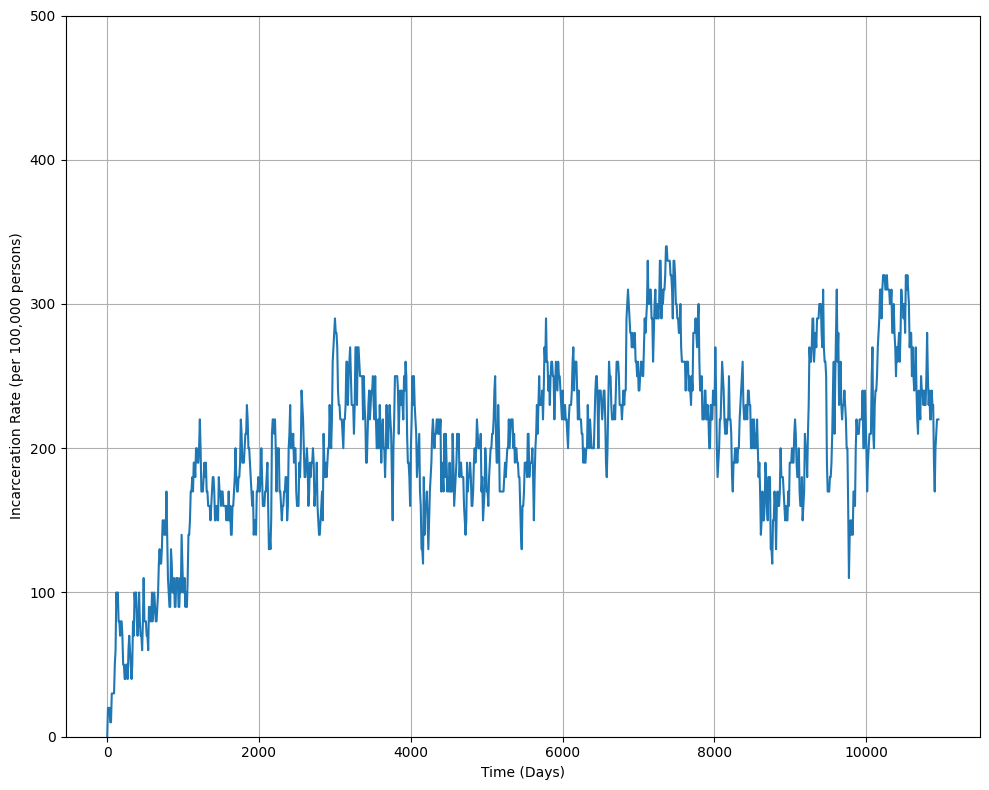

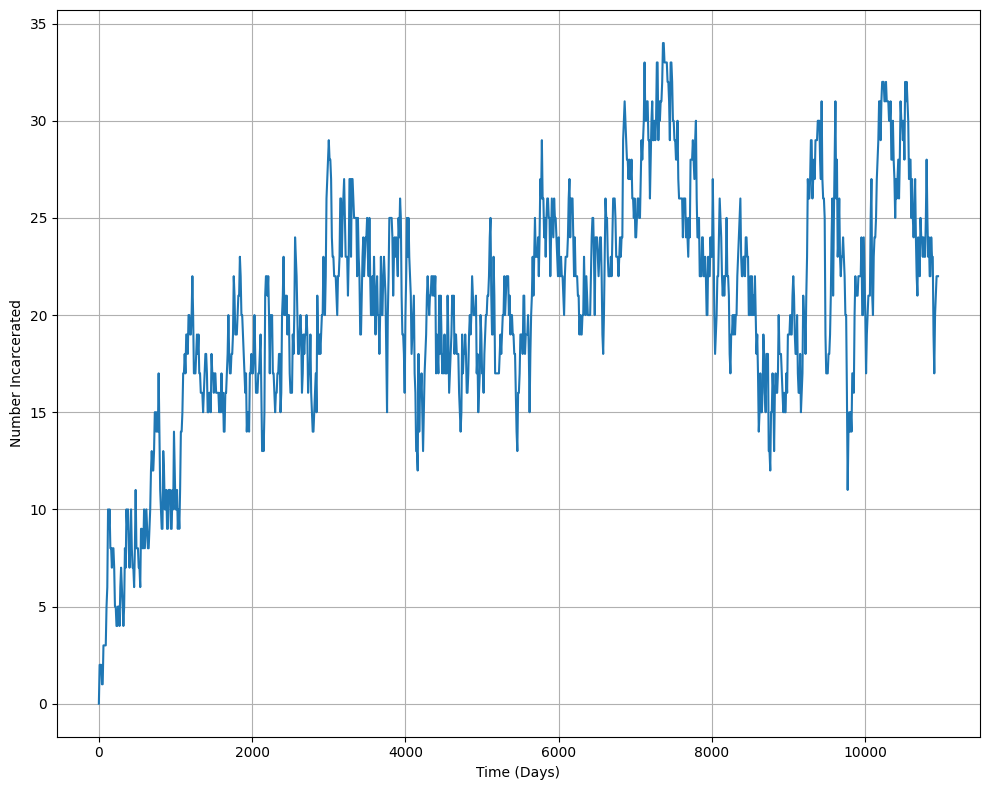

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(incarceration_summary['tick'], incarceration_summary['rate_per_100k'])
plt.title("")
plt.xlabel("Time (Days)")
plt.ylabel("Incarceration Rate (per 100,000 persons)")
plt.ylim(0, 500)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(incarceration_summary['tick'], incarceration_summary['n_incarcerated'])
plt.title("")
plt.xlabel("Time (Days)")
plt.ylabel("Number Incarcerated")
plt.grid(True)
plt.tight_layout()
plt.show()